<a href="https://colab.research.google.com/github/AkbarBunyad/EACOP_Path/blob/main/Gnuplot_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!earthengine authenticate

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=SNYFPWWTs-5ELHA30JOCht6-eZ5XvQmOSv3ByOJX7rI&tc=PJ_y7XckmwLH1fg5EI92QuWJ1su3NRXUiLObCXL5II4&cc=9iEW-FA0JNQs16N8MzZN4xuXtxY06hGqkN_gj7SpokI

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXnZ2fYbjINrURXQYa95UlofhIucsiRVaHpNdXVfsNAXUlghZGVTKIw

Successfully saved authorization token.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import ee
ee.Initialize()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/elevation.csv')

In [ ]:
#df = df.drop (columns = ['Unnamed: 2'])
df = df[df['latitude'] != (-5.13)]
df = df.drop(columns = ['Unnamed: 2'])
print(df)

    latitude  longitude
0       1.43      31.07
1       0.83      31.05
2       0.74      31.50
3       0.53      31.50
4       0.37      31.47
5      -0.28      31.41
6      -0.58      31.44
7      -0.74      31.49
8      -0.96      31.42
9      -1.19      31.43
10     -1.71      31.47
11     -2.00      31.42
12     -2.11      31.50
13     -2.42      31.55
14     -3.59      32.07
15     -4.19      33.07
16     -4.99      35.68
18     -5.10      35.90
19     -5.39      38.45
20     -5.23      38.82
21     -5.00      39.12


In [ ]:
import ee
import folium
import pandas as pd

ee.Initialize()

def get_elevation_from_earth_engine(latitude, longitude):
    # Create an Earth Engine Point geometry
    point = ee.Geometry.Point(longitude, latitude)

    # Load elevation data (SRTM data)
    elevation_data = ee.Image('USGS/SRTMGL1_003')

    # Sample elevation data at the specified point
    elevation_values = elevation_data.sampleRegions(
        collection=point,
        scale=60,
        geometries=True
    )

    try:
        # Extract elevation values from the sampled feature collection
        elevation = elevation_values.first().get('elevation').getInfo()
        return elevation
    except Exception as e:
        print(f"Error: {e}")
        return None
print(len(df))
route_points_df = df
latitude_column = 'latitude'  # Replace with the actual column name in your CSV for latitude
longitude_column = 'longitude'  # Replace with the actual column name in your CSV for longitude

# Initialize the map
map_center = [route_points_df[latitude_column].iloc[0], route_points_df[longitude_column].iloc[0]]
map_obj = folium.Map(location=map_center, zoom_start=8)

# Add markers for route points with elevation, latitude, and longitude as popup
for index, row in route_points_df.iterrows():
    latitude = row[latitude_column]
    longitude = row[longitude_column]
    elevation = get_elevation_from_earth_engine(latitude, longitude)
    if elevation is not None:
        marker_popup = f"Latitude: {latitude}<br>Longitude: {longitude}<br>Elevation: {elevation} meters"
    else:
        marker_popup = f"Latitude: {latitude}<br>Longitude: {longitude}<br>Elevation data not available"
    folium.Marker(location=[latitude, longitude], popup=marker_popup).add_to(map_obj)

# Display the map

points = list(zip(route_points_df[latitude_column], route_points_df[longitude_column]))
folium.PolyLine(points, color="black", weight=2.5, opacity=1).add_to(map_obj)
map_obj


21


In [ ]:
import folium
import shapely.geometry as geom
import random

# Assuming you have a DataFrame named 'route_points_df' with latitude and longitude columns
# ... Your previous code to create the 'map_obj' with the path ...

# Convert the route points to a Shapely LineString object
line = geom.LineString(list(zip(route_points_df['longitude'], route_points_df['latitude'])))

# Interpolate 100 points evenly along the line
interpolated_points = [line.interpolate(i / 400, normalized=True) for i in range(401)]
selected_points = random.sample(interpolated_points, 400)

# Create a list to store points with latitude, longitude, and elevation
points_with_elevation = []

# Retrieve elevation for selected points
for point in selected_points:
    longitude, latitude = point.coords[0]  # Use the correct order from your DataFrame
    elevation = get_elevation_from_earth_engine(latitude, longitude)
    if elevation is not None:
        points_with_elevation.append({'latitude': latitude, 'longitude': longitude, 'elevation': elevation})

# Create a DataFrame from points with elevation
elevation_df = pd.DataFrame(points_with_elevation)

In [ ]:
print(elevation_df)

     latitude  longitude  elevation
0    1.071303  31.058043       1109
1   -1.632142  31.464011       1167
2   -4.170005  33.036676       1182
3    0.494781  31.493396       1274
4   -0.283312  31.410331       1247
..        ...        ...        ...
395 -4.446334  33.906289       1141
396 -2.316739  31.533345       1343
397 -5.019851  39.094107         15
398 -4.186792  33.064653       1207
399 -3.546830  32.050813       1158

[400 rows x 3 columns]


In [ ]:
elevation_df.to_csv('elevation_data_update.csv', index=False)

In [ ]:
import shutil

# Specify the source file path (in Colab)
source_file_path = 'elevation_data_update.csv'

# Specify the destination folder path in Google Drive
destination_folder_path = '/content/drive/MyDrive/'

# Copy the file to Google Drive
shutil.copy(source_file_path, destination_folder_path)


'/content/drive/MyDrive/elevation_data_update.csv'

In [ ]:
!sudo apt-get install -y gnuplot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn gnuplot-data gnuplot-qt libevdev2 libgudev-1.0-0 libinput-bin
  libinput10 liblua5.4-0 libmd4c0 libmtdev1 libnotify4 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5printsupport5 libqt5svg5
  libqt5widgets5 libwacom-bin libwacom-common libwacom9 libwxbase3.0-0v5
  libwxgtk3.0-gtk3-0v5 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qt5-gtk-platformtheme qttranslations5-l10n
Suggested packages:
  gnuplot-doc gnome-shell | notification-daemon qt5-image-formats-plugins
  qtwayland5
The following NEW packages will be installed:
  aglfn gnuplot gnuplot-data gnuplot-qt libevdev2 libgudev-1.0-0 libinput-bin
  libinput10 liblua5.4-0 libmd4c0 libmtdev1 libnotify4 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5printsupport5

In [ ]:
with open('heatmap_plot.plt', 'w') as f:
    f.write("""
    set term png size 800,600
    set output 'heatmap.png'

    # Set data separator and input file
    set datafile separator ","
    datafile = 'elevation_data_update.csv'

    # Set heatmap parameters
    set xlabel 'Longitude'
    set ylabel 'Latitude'
    set xrange [:]
    set yrange [:]
    set palette defined (0 "blue", 1000 "green", 2000 "red")

    # Plot heatmap
    plot datafile using 2:1:3 with points palette pointsize 3 pointtype 7""")

In [ ]:
!gnuplot heatmap_plot.plt

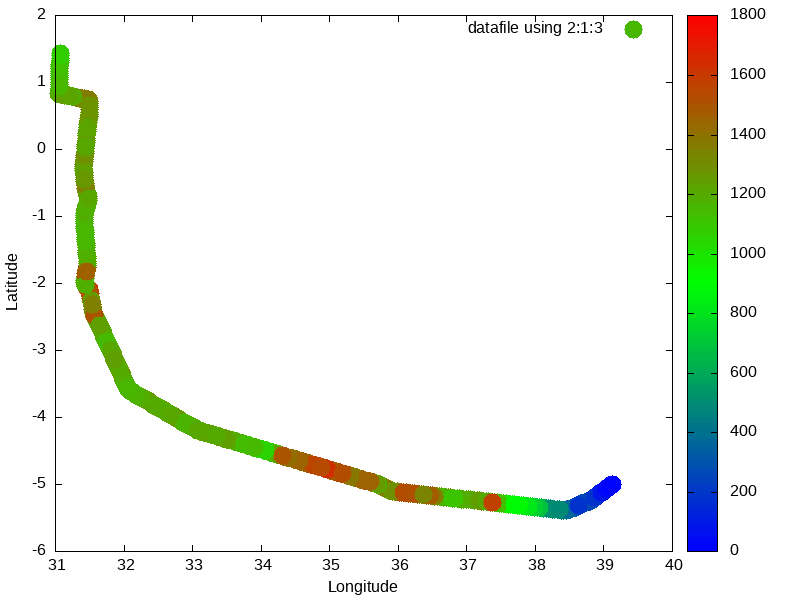

In [ ]:
from IPython.display import Image
Image(filename='heatmap.png')

In [ ]:
import shutil

# Specify the source file path (in Colab)
source_file_path = 'heatmap.png'

# Specify the destination folder path in Google Drive
destination_folder_path = '/content/drive/MyDrive/'

# Copy the file to Google Drive
shutil.copy(source_file_path, destination_folder_path)

'/content/drive/MyDrive/heatmap.png'

In [ ]:
print(df)

    latitude  longitude
0       1.43      31.07
1       0.83      31.05
2       0.74      31.50
3       0.53      31.50
4       0.37      31.47
5      -0.28      31.41
6      -0.58      31.44
7      -0.74      31.49
8      -0.96      31.42
9      -1.19      31.43
10     -1.71      31.47
11     -2.00      31.42
12     -2.11      31.50
13     -2.42      31.55
14     -3.59      32.07
15     -4.19      33.07
16     -4.99      35.68
18     -5.10      35.90
19     -5.39      38.45
20     -5.23      38.82
21     -5.00      39.12


In [ ]:
from geopy.distance import geodesic
import pandas as pd

# Initialize path_coordinates as an empty list
path_coordinates = []

# Add all rows' coordinates to path_coordinates
path_coordinates.extend(zip(df['latitude'], df['longitude']))

# Calculate total path length
total_distance = 0
for i in range(len(path_coordinates) - 1):
    coord1 = path_coordinates[i]
    coord2 = path_coordinates[i + 1]
    segment_distance = geodesic(coord1, coord2).kilometers
    total_distance += segment_distance

# Print the total path length
print('Total path length:', round(total_distance, 2), 'km')

Total path length: 1445.96 km
